In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Use this to suppress scientific notation

df = pd.read_csv('london_weather.csv')
df.sort_values(by=['date'], inplace=True)
print(df.dtypes)
df.head()

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.000,7.000,52.000,2.300,-4.100,-7.500,0.400,101900.000,9.000
1,19790102,6.000,1.700,27.000,1.600,-2.600,-7.500,0.000,102530.000,8.000
2,19790103,5.000,0.000,13.000,1.300,-2.800,-7.200,0.000,102050.000,4.000
3,19790104,8.000,0.000,13.000,-0.300,-2.600,-6.500,0.000,100840.000,2.000
4,19790105,6.000,2.000,29.000,5.600,-0.800,-1.400,0.000,102250.000,1.000


In [2]:
df.tail()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
15336,20201227,1.000,0.900,32.000,7.500,7.500,7.600,2.000,98000.000,NaN
15337,20201228,7.000,3.700,38.000,3.600,1.100,-1.300,0.200,97370.000,NaN
15338,20201229,7.000,0.000,21.000,4.100,2.600,1.100,0.000,98830.000,NaN
15339,20201230,6.000,0.400,22.000,5.600,2.700,-0.100,0.000,100200.000,NaN
15340,20201231,7.000,1.300,34.000,1.500,-0.800,-3.100,0.000,100500.000,NaN


In [3]:
df.date = pd.to_datetime(df.date, format='%Y%m%d')
df.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
dtype: object

In [4]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.000,7.000,52.000,2.300,-4.100,-7.500,0.400,101900.000,9.000
1,1979-01-02,6.000,1.700,27.000,1.600,-2.600,-7.500,0.000,102530.000,8.000
2,1979-01-03,5.000,0.000,13.000,1.300,-2.800,-7.200,0.000,102050.000,4.000
3,1979-01-04,8.000,0.000,13.000,-0.300,-2.600,-6.500,0.000,100840.000,2.000
4,1979-01-05,6.000,2.000,29.000,5.600,-0.800,-1.400,0.000,102250.000,1.000


In [5]:
df.index = pd.DatetimeIndex(df.date).to_period('M')
df_agg = df.groupby(pd.Grouper(freq="M")).agg({'cloud_cover':'mean',
                                               'sunshine':'mean',
                                               'global_radiation':'mean',
                                               'max_temp':'max',
                                               'mean_temp':'mean',
                                               'min_temp':'min',
                                               'precipitation':'sum',
                                               'pressure':'mean',
                                               'snow_depth':'sum'})
df_agg

C:\Users\Kotori\AppData\Local\Temp\ipykernel_9372\4255239392.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_agg = df.groupby(pd.Grouper(freq="M")).agg({'cloud_cover':'mean',
C:\Users\Kotori\AppData\Local\Temp\ipykernel_9372\4255239392.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  df_agg = df.groupby(pd.Grouper(freq="M")).agg({'cloud_cover':'mean',


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01,5.724,1.887,29.032,9.100,0.616,-7.500,59.900,101214.839,42.000
1979-02,6.360,1.889,45.214,9.700,2.043,-4.100,44.000,101163.929,3.000
1979-03,5.968,3.213,93.355,15.300,5.587,-3.000,94.900,100459.032,1.000
1979-04,6.133,3.543,134.167,22.400,8.743,-1.700,77.600,101165.333,0.000
1979-05,5.290,6.471,204.065,26.200,11.490,-0.900,87.000,101362.581,0.000
...,...,...,...,...,...,...,...,...,...
2020-08,5.000,6.135,210.742,36.500,20.393,8.100,56.200,101224.194,0.000
2020-09,4.200,6.540,170.000,29.600,16.617,6.500,19.200,101695.000,0.000
2020-10,5.774,1.887,72.516,18.900,11.933,4.900,143.600,100804.516,0.000


In [6]:
df.index = pd.DatetimeIndex(df.date).to_period('Y')
df_year = df.groupby(pd.Grouper(freq="Y")).agg({'cloud_cover':'mean',
                                               'sunshine':'mean',
                                               'global_radiation':'mean',
                                               'max_temp':'max',
                                               'mean_temp':'mean',
                                               'min_temp':'min',
                                               'precipitation':'sum',
                                               'pressure':'mean',
                                               'snow_depth':'sum'})
df_year

C:\Users\Kotori\AppData\Local\Temp\ipykernel_9372\1138510478.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_year = df.groupby(pd.Grouper(freq="Y")).agg({'cloud_cover':'mean',
C:\Users\Kotori\AppData\Local\Temp\ipykernel_9372\1138510478.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  df_year = df.groupby(pd.Grouper(freq="Y")).agg({'cloud_cover':'mean',


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979,5.614,3.896,112.592,29.900,9.987,-7.500,684.700,101346.181,47.000
1980,5.380,4.142,114.705,29.000,10.370,-6.000,588.100,101537.596,0.000
1981,5.599,3.601,108.055,28.800,10.320,-11.800,679.600,101501.425,69.000
1982,5.241,4.143,117.274,29.300,10.999,-10.100,649.800,101537.288,112.000
1983,5.255,4.102,116.688,32.800,11.237,-7.000,535.000,101637.096,3.000
1984,5.301,4.292,118.552,31.700,10.942,-3.100,641.700,101494.290,0.000
1985,5.479,4.212,116.992,29.800,10.096,-8.000,526.300,101553.507,45.000
1986,5.460,4.173,116.216,30.600,9.998,-9.600,637.000,101545.452,37.000
1987,5.720,3.814,111.523,29.200,10.288,-9.100,654.000,101624.137,12.000


In [7]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

cloud_cover           19
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


In [8]:
df = df.fillna(df.mean())

In [9]:
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df_agg['precipitation'], autolag='AIC')
print("P-value: ", stationarity[1])
#monthly stationarity test

P-value:  0.0


Our monthly model appears to stationary.

In [10]:
stationarity = adfuller(df_year['precipitation'], autolag='AIC')
print("P-value: ", stationarity[1])
#yearly stationarity test

P-value:  0.40782363468628335


In [11]:
# First-order differencing (removes trend)
df_year['precipitation_diff_1'] = df_year['precipitation'].diff(periods=1)

# Second-order differencing (removes trend and possible seasonality effects)
df_year['precipitation_diff_2'] = df_year['precipitation'].diff(periods=2)

# Display the first few rows
df_year.head()


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,precipitation_diff_1,precipitation_diff_2
date,,,,,,,,,,,
1979,5.614,3.896,112.592,29.900,9.987,-7.500,684.700,101346.181,47.000,NaN,NaN
1980,5.380,4.142,114.705,29.000,10.370,-6.000,588.100,101537.596,0.000,-96.600,NaN
1981,5.599,3.601,108.055,28.800,10.320,-11.800,679.600,101501.425,69.000,91.500,-5.100
1982,5.241,4.143,117.274,29.300,10.999,-10.100,649.800,101537.288,112.000,-29.800,61.700
1983,5.255,4.102,116.688,32.800,11.237,-7.000,535.000,101637.096,3.000,-114.800,-144.600


In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Series([], dtype: int64)


In [13]:
# monthly aggregate of precipitation
y = df_year['precipitation']
X = df_year.drop(columns=['precipitation', "snow_depth", "min_temp", "global_radiation", "cloud_cover"]).assign(const=1)
# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results

#YEARLY MODEL

MissingDataError: exog contains inf or nans

In [ ]:
# Assuming model_yearly is your fitted OLS model for yearly data
df_year_insample = pd.DataFrame({'Actual': df_year['precipitation'], 
                                 'Predicted': results.fittedvalues,  # Use results from the yearly model
                                 'Residuals (Error)': df_year['precipitation'] - results.fittedvalues})

# Adding columns for absolute and squared residuals
df_year_insample['Absolute Residual'] = abs(df_year_insample['Residuals (Error)'])
df_year_insample['Squared Residual'] = df_year_insample['Residuals (Error)']**2

mae_year = round(df_year_insample['Absolute Residual'].mean(), 4)
rmse_year = round(df_year_insample['Squared Residual'].mean() ** (1/2), 4)

# Display the first few rows and the metrics
print(f"Yearly MAE:\t{mae_year}")
print(f"Yearly RMSE:\t{rmse_year}")
df_year_insample.head(10)


IncompatibleFrequency: Input has different freq=M from Period(freq=Y-DEC)

In [ ]:
# monthly aggregate of precipitation
y = df_agg['precipitation']
X = df_agg.drop(columns=['precipitation', "snow_depth", "min_temp", "global_radiation", "cloud_cover"]).assign(const=1)

# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results

#MONTHLY MODEL

                            OLS Regression Results                            
Dep. Variable:          precipitation   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.42e-82
Time:                        22:08:42   Log-Likelihood:                -2231.0
No. Observations:                 504   AIC:                             4472.
Df Residuals:                     499   BIC:                             4493.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sunshine      -3.7280      0.818     -4.559      0.0

In [ ]:
df_month_insample = pd.DataFrame({'Actual': df_agg['precipitation'], 
                                 'Predicted': results.fittedvalues,  # Use results from the yearly model
                                 'Residuals (Error)': df_agg['precipitation'] - results.fittedvalues})


# Adding columns for absolute and squared residuals
df_month_insample['Absolute Residual'] = abs(df_month_insample['Residuals (Error)'])
df_month_insample['Squared Residual'] = df_month_insample['Residuals (Error)']**2

# Calculate MAE and RMSE
mae_month = round(df_month_insample['Absolute Residual'].mean(), 4)
rmse_month = round(df_month_insample['Squared Residual'].mean() ** (1/2), 4)

# Display the first few rows and the metrics
print(f"Monthly MAE:\t{mae_month}")
print(f"Monthly RMSE:\t{rmse_month}")
df_month_insample.head(10)


Monthly MAE:	15.3409
Monthly RMSE:	20.2416


,Actual,Predicted,Residuals (Error),Absolute Residual,Squared Residual
date,,,,,
1979-01,59.900,58.757,1.143,1.143,1.307
1979-02,44.000,63.967,-19.967,19.967,398.696
1979-03,94.900,89.180,5.720,5.720,32.721
1979-04,77.600,59.526,18.074,18.074,326.683
1979-05,87.000,43.489,43.511,43.511,1893.223
1979-06,37.600,41.208,-3.608,3.608,13.020
1979-07,21.700,33.462,-11.762,11.762,138.334
1979-08,33.400,61.457,-28.057,28.057,787.202
1979-09,20.800,29.705,-8.905,8.905,79.296


I am not 100% sure if we had covered this in class, but I thought it was relatively interesting to read about in the book so I applied it here when comparing the differences.

The yearly model has higher prediction errors compared to the monthly model. With an MAE of 45.99 and RMSE of 58.00, the yearly model's predictions are off by a larger margin on average. In contrast, the monthly model has smaller MAE (15.26) and RMSE (20.15), meaning it performs better at predicting monthly data. The residuals show that some months, like February 1979, have much larger errors than others, which is reflected in the squared residuals. Overall, the monthly model captures the data more accurately, while the yearly model shows significant discrepancies.

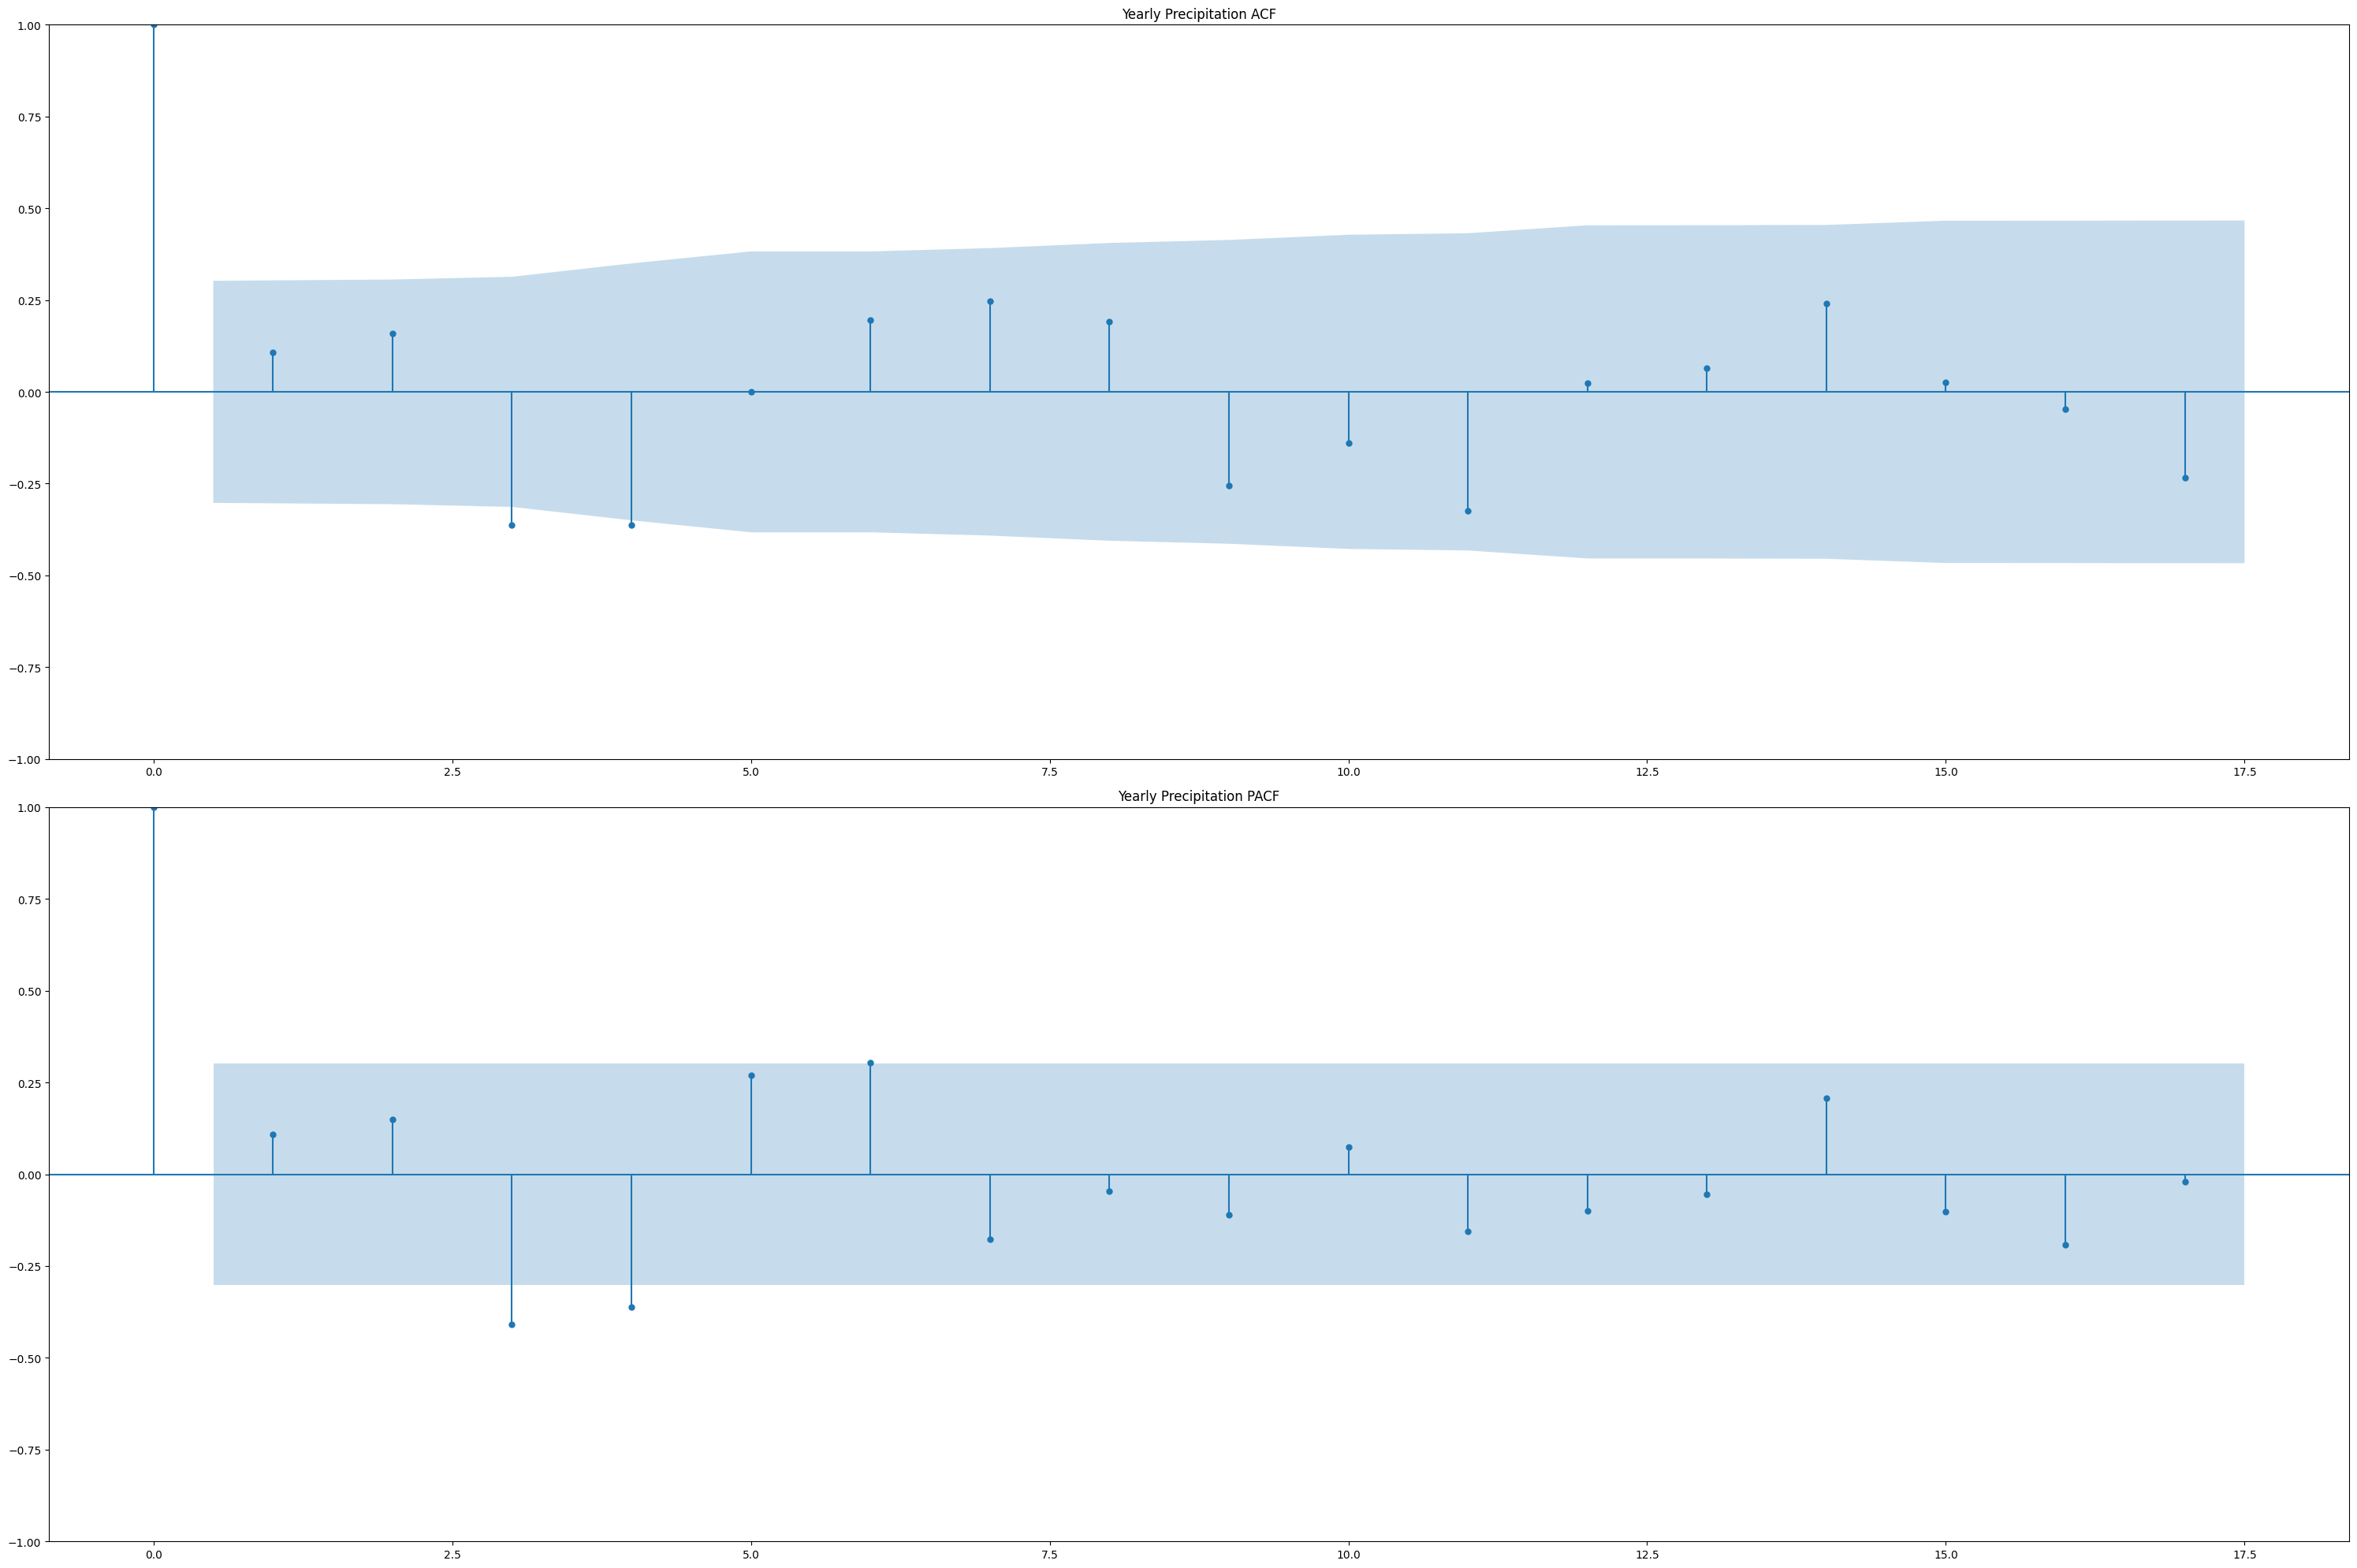

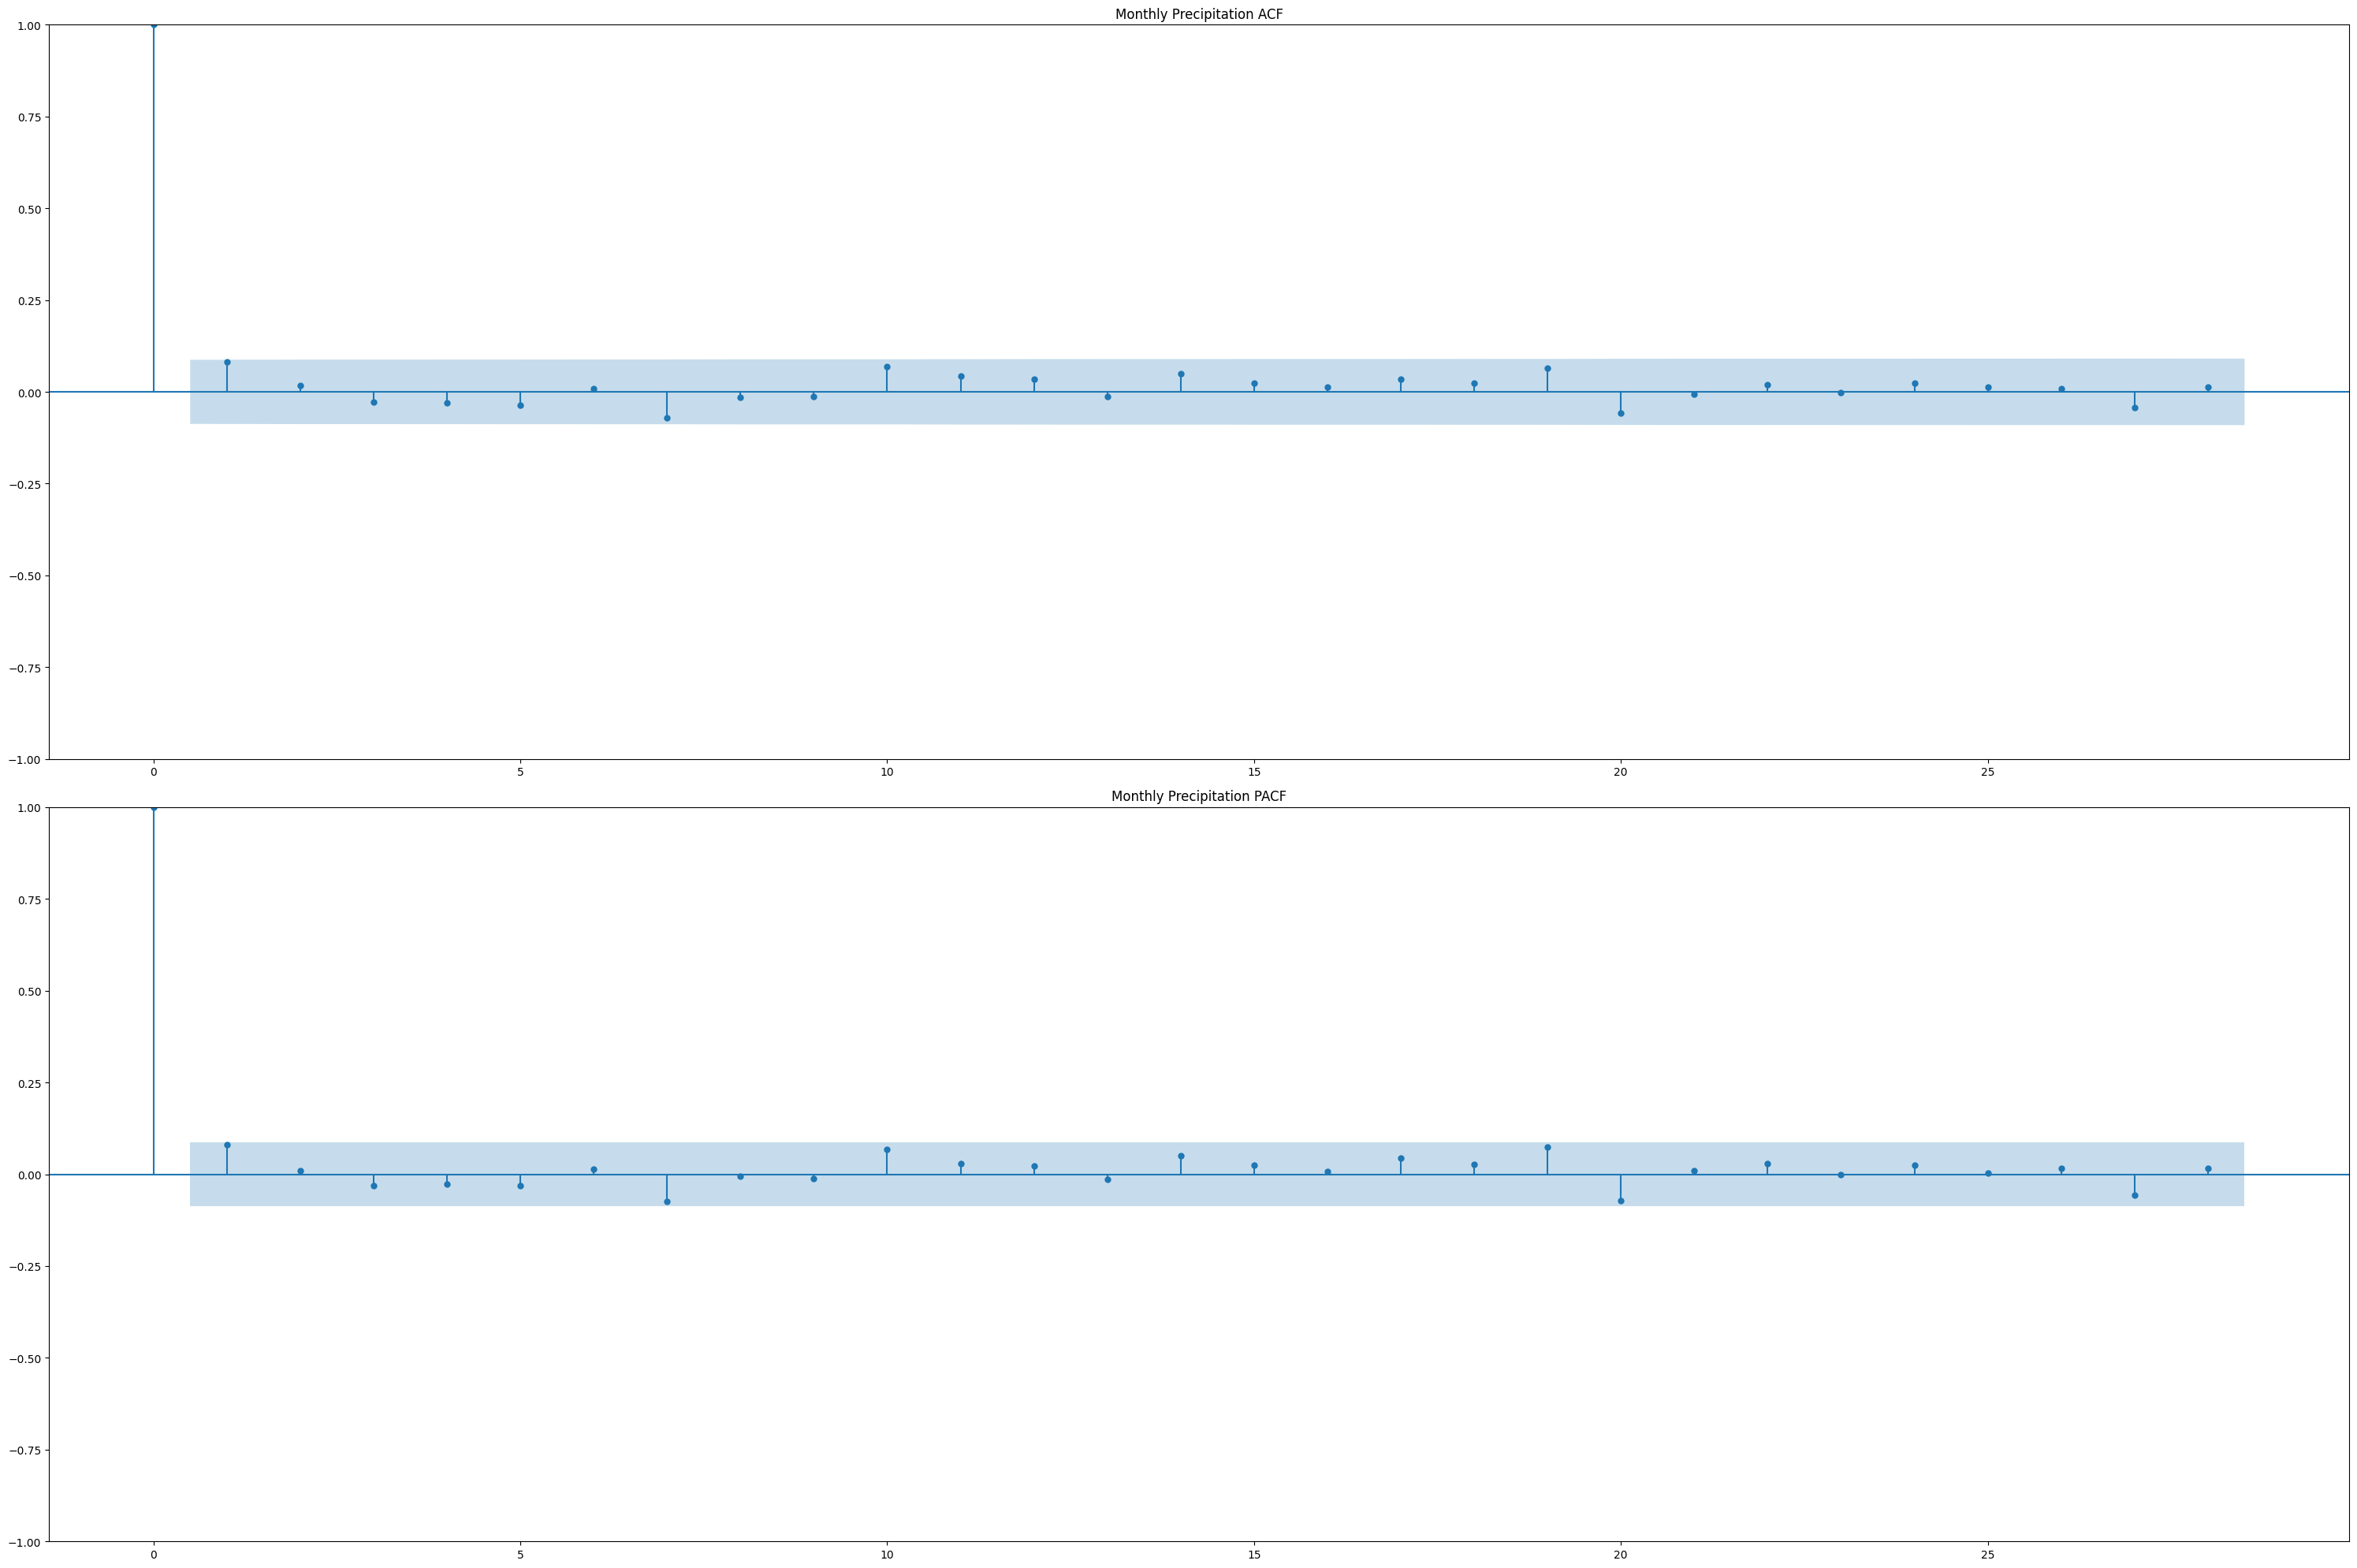

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# For Yearly Precipitation
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))

# Plot ACF and PACF for yearly precipitation
plot_acf(df_year['precipitation'], ax=ax[0], title="Yearly Precipitation ACF")
plot_pacf(df_year['precipitation'], ax=ax[1], title="Yearly Precipitation PACF")

plt.tight_layout()
plt.show()

# For Monthly Precipitation
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))

# Plot ACF and PACF for monthly precipitation
plot_acf(df_agg['precipitation'], ax=ax[0], title="Monthly Precipitation ACF")
plot_pacf(df_agg['precipitation'], ax=ax[1], title="Monthly Precipitation PACF")

plt.tight_layout()
plt.show()


In [ ]:
y = df_year['precipitation']
X = df_year.drop(columns=['precipitation', "cloud_cover", "global_radiation", "snow_depth", "min_temp", "sunshine", "mean_temp"]).assign(const=1)

# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results
#YEARLY MODEL

                            OLS Regression Results                            
Dep. Variable:          precipitation   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     17.89
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.07e-06
Time:                        21:51:13   Log-Likelihood:                -238.14
No. Observations:                  42   AIC:                             482.3
Df Residuals:                      39   BIC:                             487.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
max_temp      -7.4299      4.269     -1.740      0.0

In [ ]:
# monthly aggregate of precipitation
y = df_agg['precipitation']
X = df_agg.drop(columns=['precipitation', "snow_depth", "min_temp", "global_radiation", "cloud_cover"]).assign(const=1)

# Run the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())  # View results

#MONTHLY MODEL

                            OLS Regression Results                            
Dep. Variable:          precipitation   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     146.0
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.42e-82
Time:                        21:51:13   Log-Likelihood:                -2231.0
No. Observations:                 504   AIC:                             4472.
Df Residuals:                     499   BIC:                             4493.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sunshine      -3.7280      0.818     -4.559      0.0

Our final model for yearly is: Precipitation=56500+(−7.4299×max_temp)+(−0.5481×pressure)

Our final model for monthly is: precipitation=4053.3182+(−3.7280×sunshine)+(−1.3495×max_temp)+(2.8234×mean_temp)+(−0.0393×pressure)